http://preview.d2l.ai/d2l-en/master/chapter_optimization/gd.html

In [1]:
%matplotlib inline
from d2l import torch as d2l
import numpy as np
import torch

f = lambda x: x**2  # Objective function
gradf = lambda x: 2 * x  # Its derivative

In [2]:
def gd(eta):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


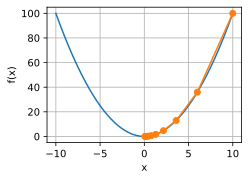

In [3]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, res], [[f(x) for x in f_line], [f(x) for x in res]],
             'x', 'f(x)', fmts=['-', '-o'])

show_trace(res)

epoch 10, x: 3.4867844009999995


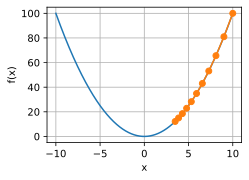

In [4]:
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


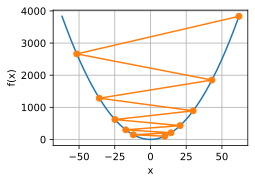

In [5]:
show_trace(gd(1.1))

epoch 10, x: tensor(-1.5282)


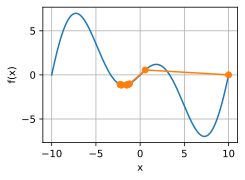

In [6]:
c = torch.tensor(0.15 * np.pi)
f = lambda x: x * torch.cos(c * x)
gradf = lambda x: torch.cos(c * x) - c * x * torch.sin(c * x)
show_trace(gd(2))

epoch 10, x: tensor(-1.5282)


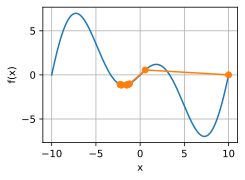

In [7]:
c = torch.tensor(0.15 * np.pi)
f = lambda x: x * torch.cos(c * x)
gradf = lambda x: torch.cos(c * x) - c * x * torch.sin(c * x)
show_trace(gd(2))

In [8]:
def train_2d(trainer, steps=20):  #@save
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

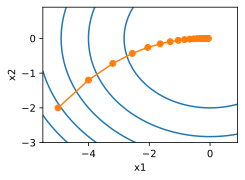

In [9]:
f = lambda x1, x2: x1 ** 2 + 2 * x2 ** 2  # Objective
gradf = lambda x1, x2: (2 * x1, 4 * x2)  # Gradient

def gd(x1, x2, s1, s2):
    (g1, g2) = gradf(x1, x2)  # Compute gradient
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)  # Update variables

eta = 0.1
show_trace_2d(f, train_2d(gd))

epoch 10, x: tensor(0.)


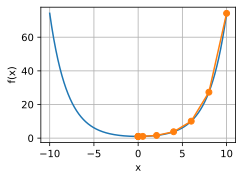

In [10]:
c = torch.tensor(0.5)
f = lambda x: torch.cosh(c * x)  # Objective
gradf = lambda x: c * torch.sinh(c * x)  # Derivative
hessf = lambda x: c**2 * torch.cosh(c * x)  # Hessian

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton())

epoch 10, x: tensor(26.8341)


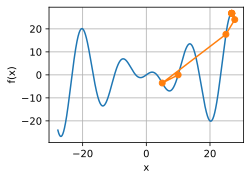

In [11]:
c = torch.tensor(0.15 * np.pi)
f = lambda x: x * torch.cos(c * x)
gradf = lambda x: torch.cos(c * x) - c * x * torch.sin(c * x)
hessf = lambda x: - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton())

epoch 10, x: tensor(7.2699)


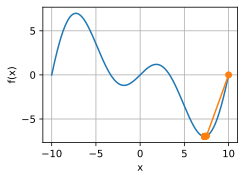

In [12]:
show_trace(newton(0.5))